Here is the case study for Lending Club data analysis. 
The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [423]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
lc = pd.read_csv('loan.csv')

C:\Users\venkats\AppData\Local\Temp\ipykernel_27392\3295163602.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lc = pd.read_csv('loan.csv')


In [425]:
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [426]:
list(lc.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [427]:
loan = lc[(lc.loan_status =='Charged Off') | (lc.loan_status =='Fully Paid')][['id','annual_inc','loan_status','loan_amnt','emp_length','funded_amnt', 'funded_amnt_inv', 'term','issue_d','int_rate','installment', 'grade','sub_grade','dti','delinq_2yrs','home_ownership', 'revol_util', 'purpose','verification_status']]

In [428]:
loan.head()

,id,annual_inc,loan_status,loan_amnt,emp_length,funded_amnt,funded_amnt_inv,term,issue_d,int_rate,installment,grade,sub_grade,dti,delinq_2yrs,home_ownership,revol_util,purpose,verification_status
0,1077501,24000.0,Fully Paid,5000,10+ years,5000,4975.0,36 months,Dec-11,10.65%,162.87,B,B2,27.65,0,RENT,83.70%,credit_card,Verified
1,1077430,30000.0,Charged Off,2500,< 1 year,2500,2500.0,60 months,Dec-11,15.27%,59.83,C,C4,1.00,0,RENT,9.40%,car,Source Verified
2,1077175,12252.0,Fully Paid,2400,10+ years,2400,2400.0,36 months,Dec-11,15.96%,84.33,C,C5,8.72,0,RENT,98.50%,small_business,Not Verified
3,1076863,49200.0,Fully Paid,10000,10+ years,10000,10000.0,36 months,Dec-11,13.49%,339.31,C,C1,20.00,0,RENT,21%,other,Source Verified
5,1075269,36000.0,Fully Paid,5000,3 years,5000,5000.0,36 months,Dec-11,7.90%,156.46,A,A4,11.20,0,RENT,28.30%,wedding,Source Verified


In [429]:
# Check the remaining fields dataframe its Information

loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   annual_inc           38577 non-null  float64
 2   loan_status          38577 non-null  object 
 3   loan_amnt            38577 non-null  int64  
 4   emp_length           37544 non-null  object 
 5   funded_amnt          38577 non-null  int64  
 6   funded_amnt_inv      38577 non-null  float64
 7   term                 38577 non-null  object 
 8   issue_d              38577 non-null  object 
 9   int_rate             38577 non-null  object 
 10  installment          38577 non-null  float64
 11  grade                38577 non-null  object 
 12  sub_grade            38577 non-null  object 
 13  dti                  38577 non-null  float64
 14  delinq_2yrs          38577 non-null  int64  
 15  home_ownership       38577 non-null  obje

In [430]:
# find the percentage of nulls in the columns
loan.isnull().sum()/len(lc)*100


id                     0.000000
annual_inc             0.000000
loan_status            0.000000
loan_amnt              0.000000
emp_length             2.600901
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
issue_d                0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
dti                    0.000000
delinq_2yrs            0.000000
home_ownership         0.000000
revol_util             0.125891
purpose                0.000000
verification_status    0.000000
dtype: float64

In [431]:
# Since < 5% of EMp_length was null, impute with maximum occurence values. Here data is filtered with loan_status
loan.loc[(loan.emp_length.isna()), 'emp_length' ] = '10+ years'

In [432]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [433]:
# covery emp_length column to float, year and years are removed and less than 1 is treated as 0 and 10+ as 10
#loan.loc[:, 'emp_length' ] = loan.loc[:,'emp_length' ].replace(' years','').replace(' year','').replace('< 1','0').replace('+','')

loan.loc[:,'emp_length'] = loan.emp_length.str.replace(' years','').str.replace(' year','').str.replace('< 1','0').str.replace('+','')


loan.loc[:, 'emp_length' ] = loan.emp_length.apply(lambda x : float(x))



In [434]:
# convert interest rate field to float

loan.loc[:,'int_rate'] = loan.int_rate.str.replace('%','')

loan['int_rate'] = loan['int_rate'].astype(float)

In [435]:
#convert loan term to int

loan.loc[:,'term' ] = loan.loc[:,'term'].str.replace('months','').astype(int)

In [436]:
#revol_util

#find null count

loan.revol_util.isnull().sum() # 50 rows out of 39K are null. these rows can be ignored

loan = loan[~(loan.revol_util.isnull())]

loan['revol_util'] =loan.revol_util.apply(lambda x : float(x.split('%')[0]))




In [437]:
loan.shape

(38527, 19)

In [438]:
# covert str to datetime

loan['issue_date'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

loan.loc[:,'issue_month'] = loan.issue_date.dt.month
loan.loc[:, 'issue_year'] = loan.issue_date.dt.year

In [439]:
# Additional derived fields
# Create loan_amnt groups of 5K as derived column

loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['interest_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5-10','10-15','15-20','20-25','25-30']) 

### Data Cleaned up so far, lets look at Visualitzation

#### First check the category variable loan status - Simple bar graph

In [440]:
cat_columns = loan.select_dtypes(include=['object']).columns

num_columns = loan.select_dtypes(include=['float64', 'int64']).columns

print(cat_columns)
print(num_columns)

Index(['loan_status', 'emp_length', 'term', 'issue_d', 'grade', 'sub_grade',
       'home_ownership', 'purpose', 'verification_status'],
      dtype='object')
Index(['id', 'annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'dti', 'delinq_2yrs', 'revol_util'],
      dtype='object')


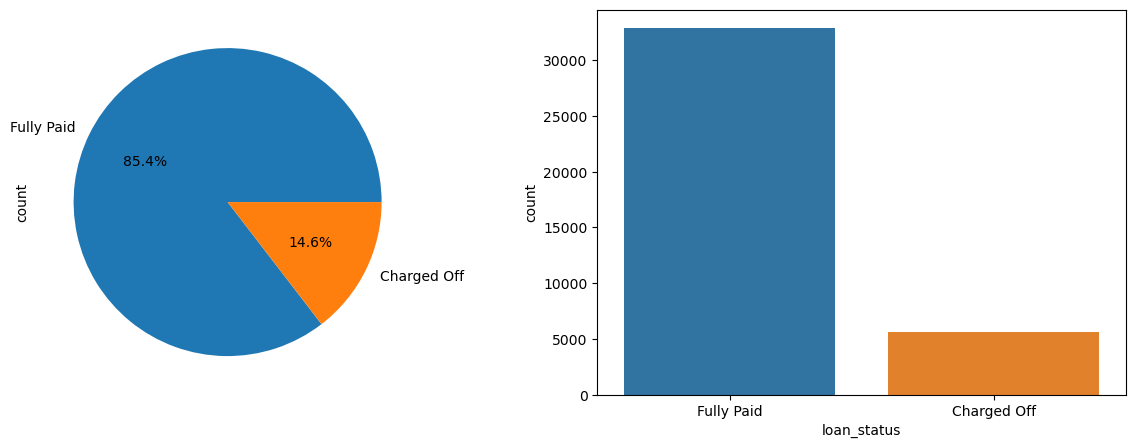

In [441]:
#pie chart & bar chart side by side using subplot of loan status using seaborn different color for each loan status

fx, axes = plt.subplots(1,2, figsize=(15,5))

loan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
sns.countplot(x='loan_status', data=loan, ax=axes[1])
plt.show()



Inference: **Around 86% of the loans are fully paid and 16% are charged off**

In [442]:
#As there are outliers in the annual income, we can remove the outliers and plot the box plot again

#95, 99, 99.5, 99.9 percentile values are calculated to remove the outliers

p95 = loan['annual_inc'].quantile(0.95)
p99 = loan['annual_inc'].quantile(0.99)
p995 = loan['annual_inc'].quantile(0.995)
p999 = loan['annual_inc'].quantile(0.999)

#using formatting specifilters to print the values

print('95th percentile: {:,.2f},  99th percentile: {:,.2f}, max: {:,.2f}'.format(p95, p99, loan['annual_inc'].max()))

95th percentile: 140,004.00,  99th percentile: 234,000.00, max: 6,000,000.00


### Continious Variable Univariate Analysis ###

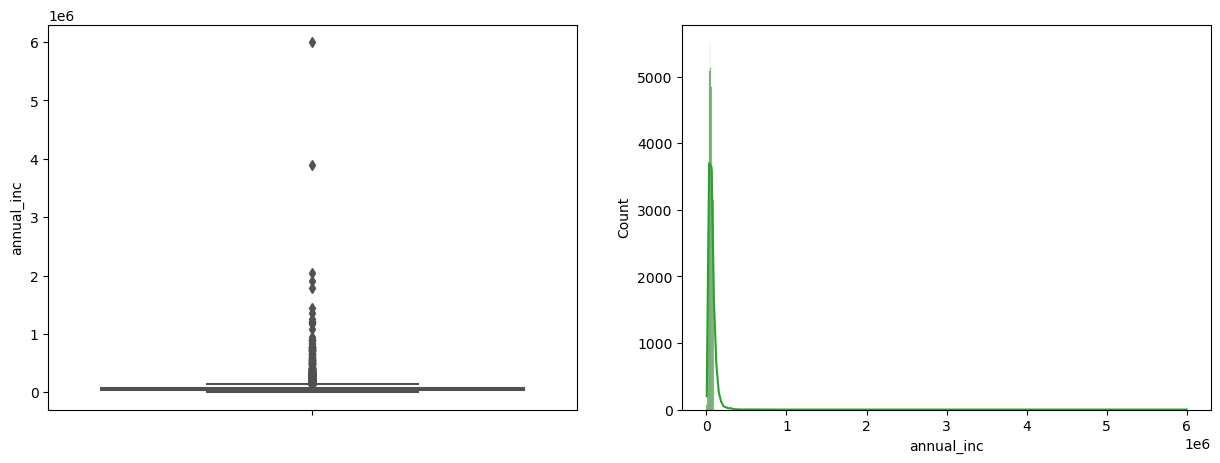

In [443]:
#Analyse lenders annual income distribution. Box Plot and bins of 10K using subplots

fx, axes = plt.subplots(1,2, figsize=(15,5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.boxplot(y='annual_inc', data=loan, color =colors[1],ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 100000, 10000), color =colors[2], kde=True, ax=axes[1])
plt.show()


#As there are outliers in the annual income, we can remove the outliers and plot the box plot again

#95, 99, 99.5, 99.9 percentile values are calculated to remove the outliers

p95 = loan['annual_inc'].quantile(0.95)
p99 = loan['annual_inc'].quantile(0.99)
p995 = loan['annual_inc'].quantile(0.995)
p999 = loan['annual_inc'].quantile(0.999)

#using formatting specifilters to print the values

print('95th percentile: {:,.2f},  99th percentile: {:,.2f}, max: {:,.2f}'.format(p95, p99, loan['annual_inc'].max()))

##### Considering only 95th percentile values. Reason is 99th percentile values are very high and it will remove most of the data. Also people with very high income are not the target customers for loan chance of paying back is high.



In [444]:
loan = loan[(loan['annual_inc'] <= p95)]

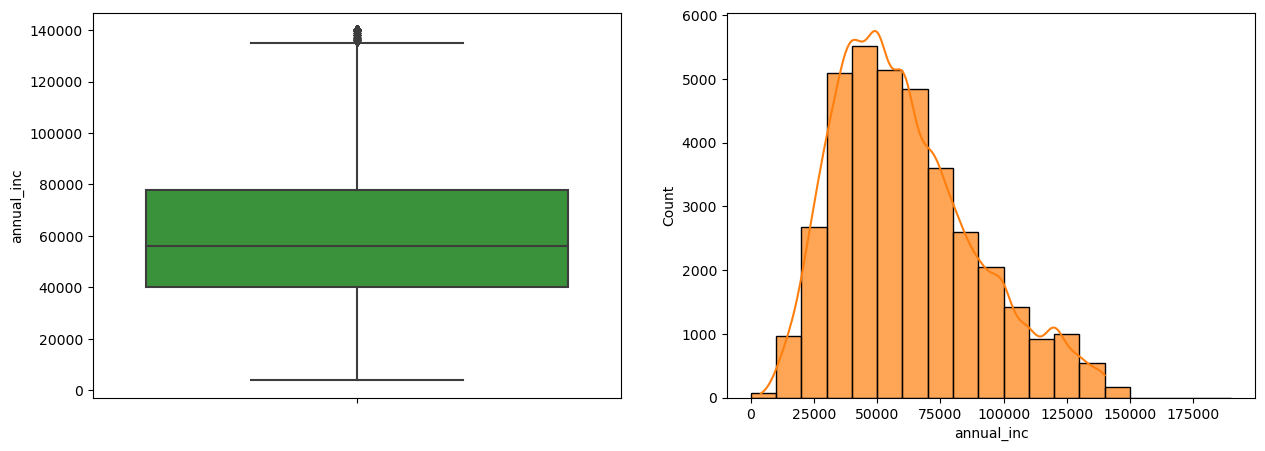

In [445]:
# #Analyse lenders annual income distribution. Box Plot and bins of 10K using subplots

#histplot should have KDE

#diffent colors for histplot and boxplot


colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='annual_inc', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 200000, 10000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()

Inference: **Most of the people who take loan have income range between 40K to 80K**

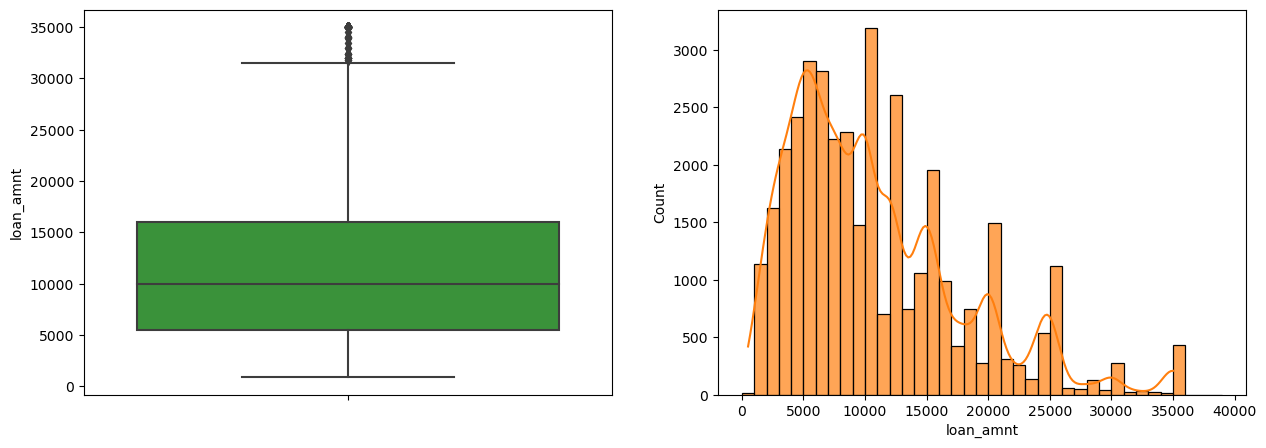

In [446]:
# Analyse the loan amount distribution using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='loan_amnt', data=loan[loan.loan_status =='Charged Off'], color=colors[2] ,ax=axes[0])
sns.histplot(loan['loan_amnt'], bins=range(0, 40000, 1000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()

Inference : **Loan amount ranges from 500 to 35000 with most of the loans between 5000 to 15000**


In [447]:
# Analyse the interest rate distribution using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='int_rate', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['int_rate'], bins=range(0, 30, 1), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()


Inference: **Interest rate ranges between 10 to 15%**

### Category Variable Univariate Analysis/Segmented Analysis ###
Employement Length, Term, Purpose, Credit History Home ownership would be analysed


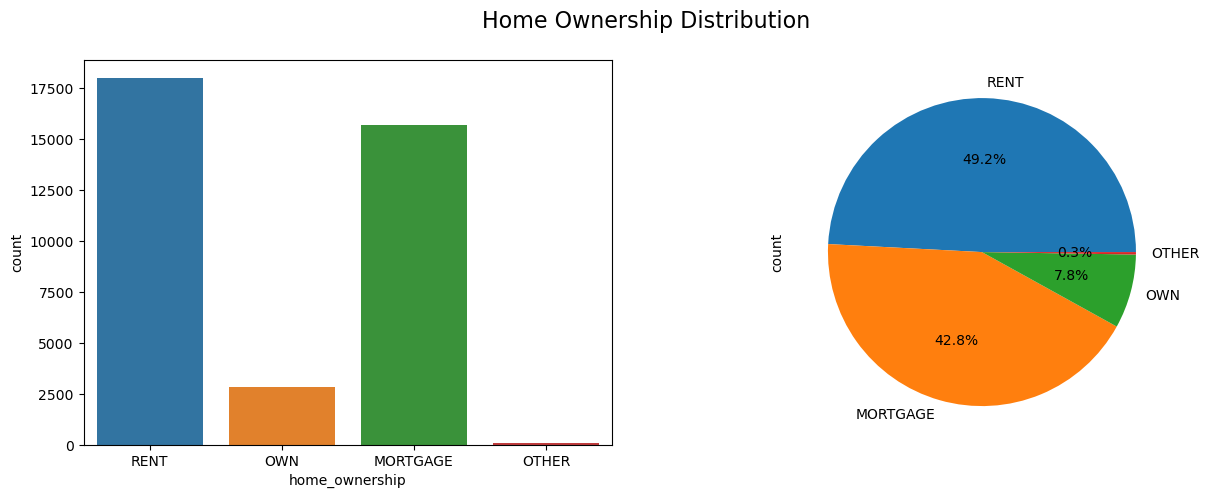

In [ ]:
#as home ownership has none.. lets find its count. Only 3 rows have none as home ownership. we can make it as Other. 

loan['home_ownership'].value_counts()
loan.loc[loan['home_ownership'] == 'NONE', 'home_ownership'] = 'OTHER'


# Home ownership distribution using countplot and pie chart using seaborn and subplot

# add common title for both the plots

fx, axes = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('Home Ownership Distribution', fontsize=16)

sns.countplot(x='home_ownership', data=loan, ax=axes[0])
loan['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])

plt.show()


Inference : **Very less people who has own home has taken loan. Most of the people who has taken loan are staying in rented house or mortgaged house.**

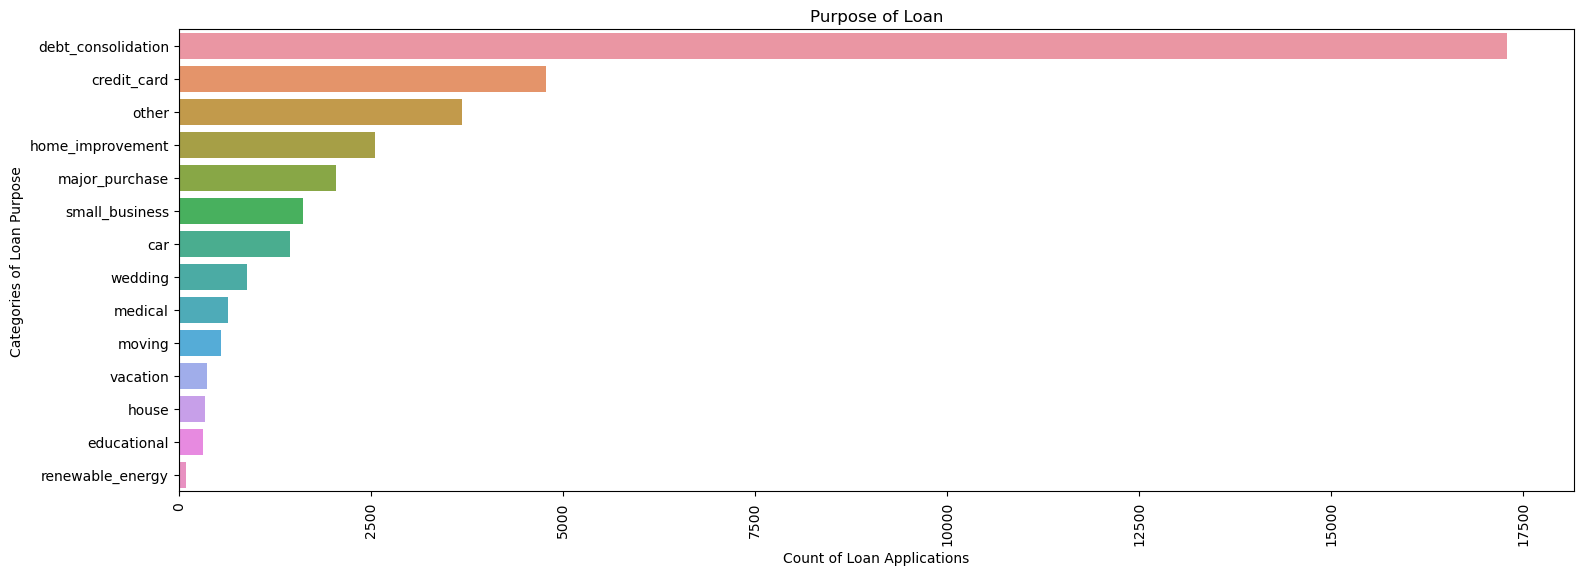

In [ ]:
# add common title for both the plots

#horizontal Bar chart for purpose of loan



plt.figure(figsize=(18,6))
sns.countplot(y='purpose', data=loan, order=loan['purpose'].value_counts().index)
plt.xlabel('Count of Loan Applications')
plt.ylabel('Categories of Loan Purpose')
plt.title('Purpose of Loan')

plt.xticks(rotation=90)
plt.show()



Inference: **Debt consolidation is biggest reason for loan**

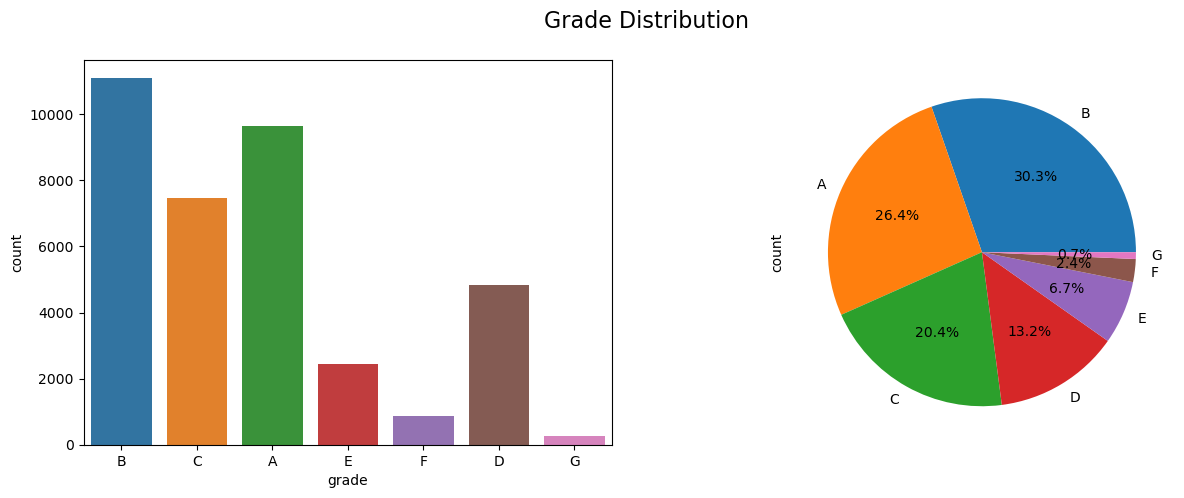

In [ ]:
#Analyse grade and subgrade distribution using countplot and pie chart using seaborn and subplot
# add common title for both the plots

#split data by Subgrade and Grade and find the count of each



fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Grade Distribution', fontsize=16)
sns.countplot(x='grade', data=loan, ax=axes[0])
loan['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])


plt.show()


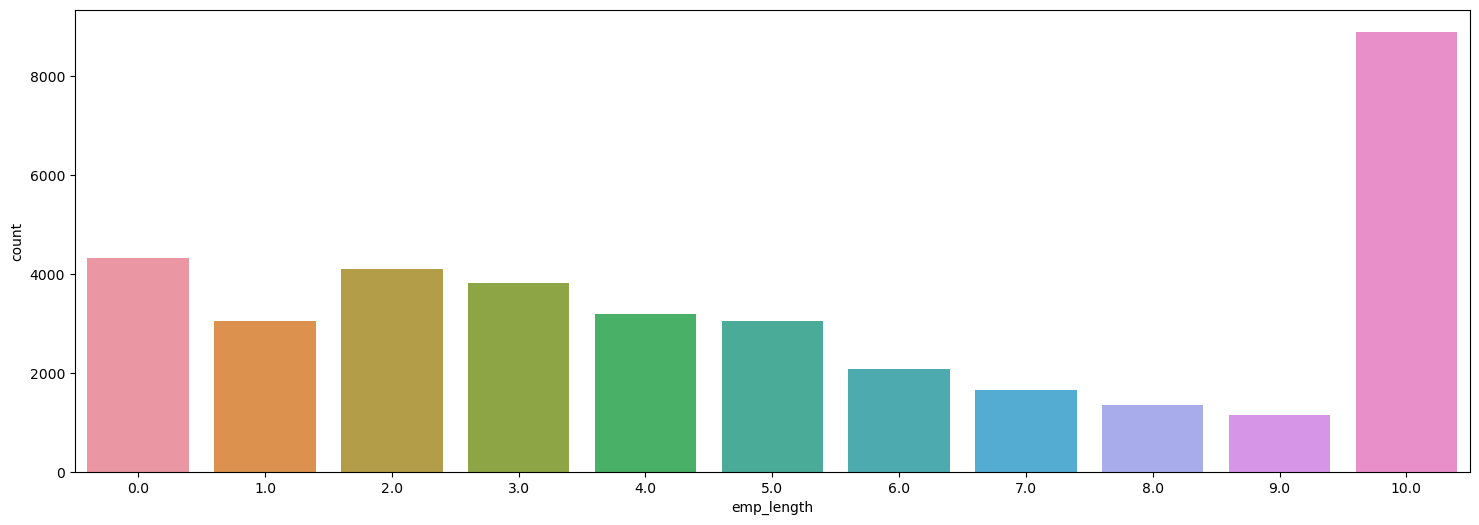

In [ ]:
# Employmnet length distribution using countplot and Histogram using seaborn and subplot

# add common title for both the plots

#split data by emp_length and find the count of each

plt.figure(figsize=(18,6))
sns.countplot(x='emp_length', data=loan)
plt.show()


Inference: ***Most of the applicants have 10+ years of employment history, clould be planning to buy a house or car or for other purposes.***


#### Analyse Deafulters data. Find possible reasons for defaulting

In [ ]:
loan_def = loan[loan.loan_status == 'Charged Off']

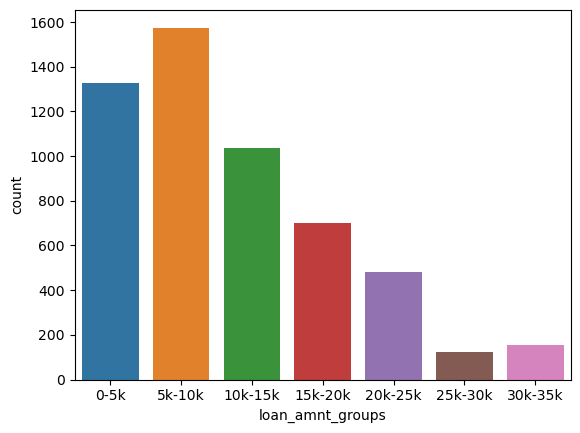

In [ ]:
sns.countplot(x='loan_amnt_groups', data=loan_def)
plt.show()

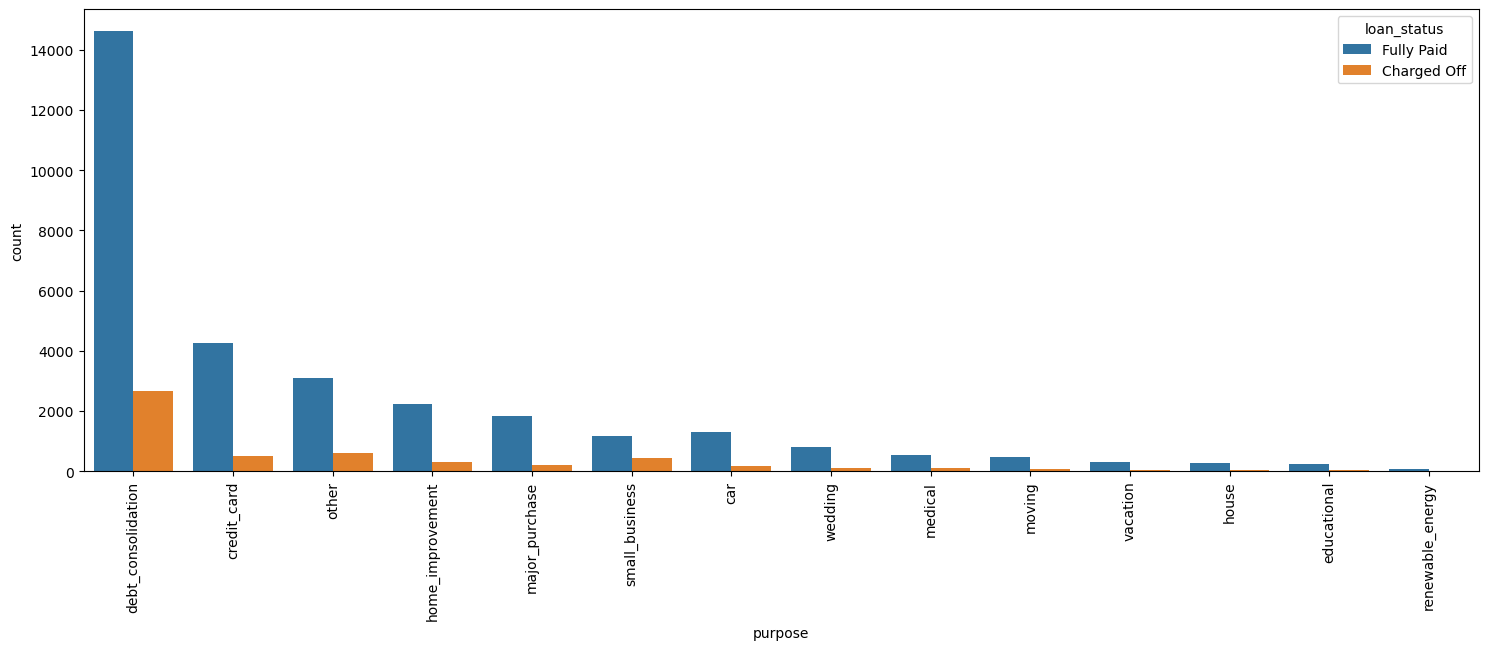

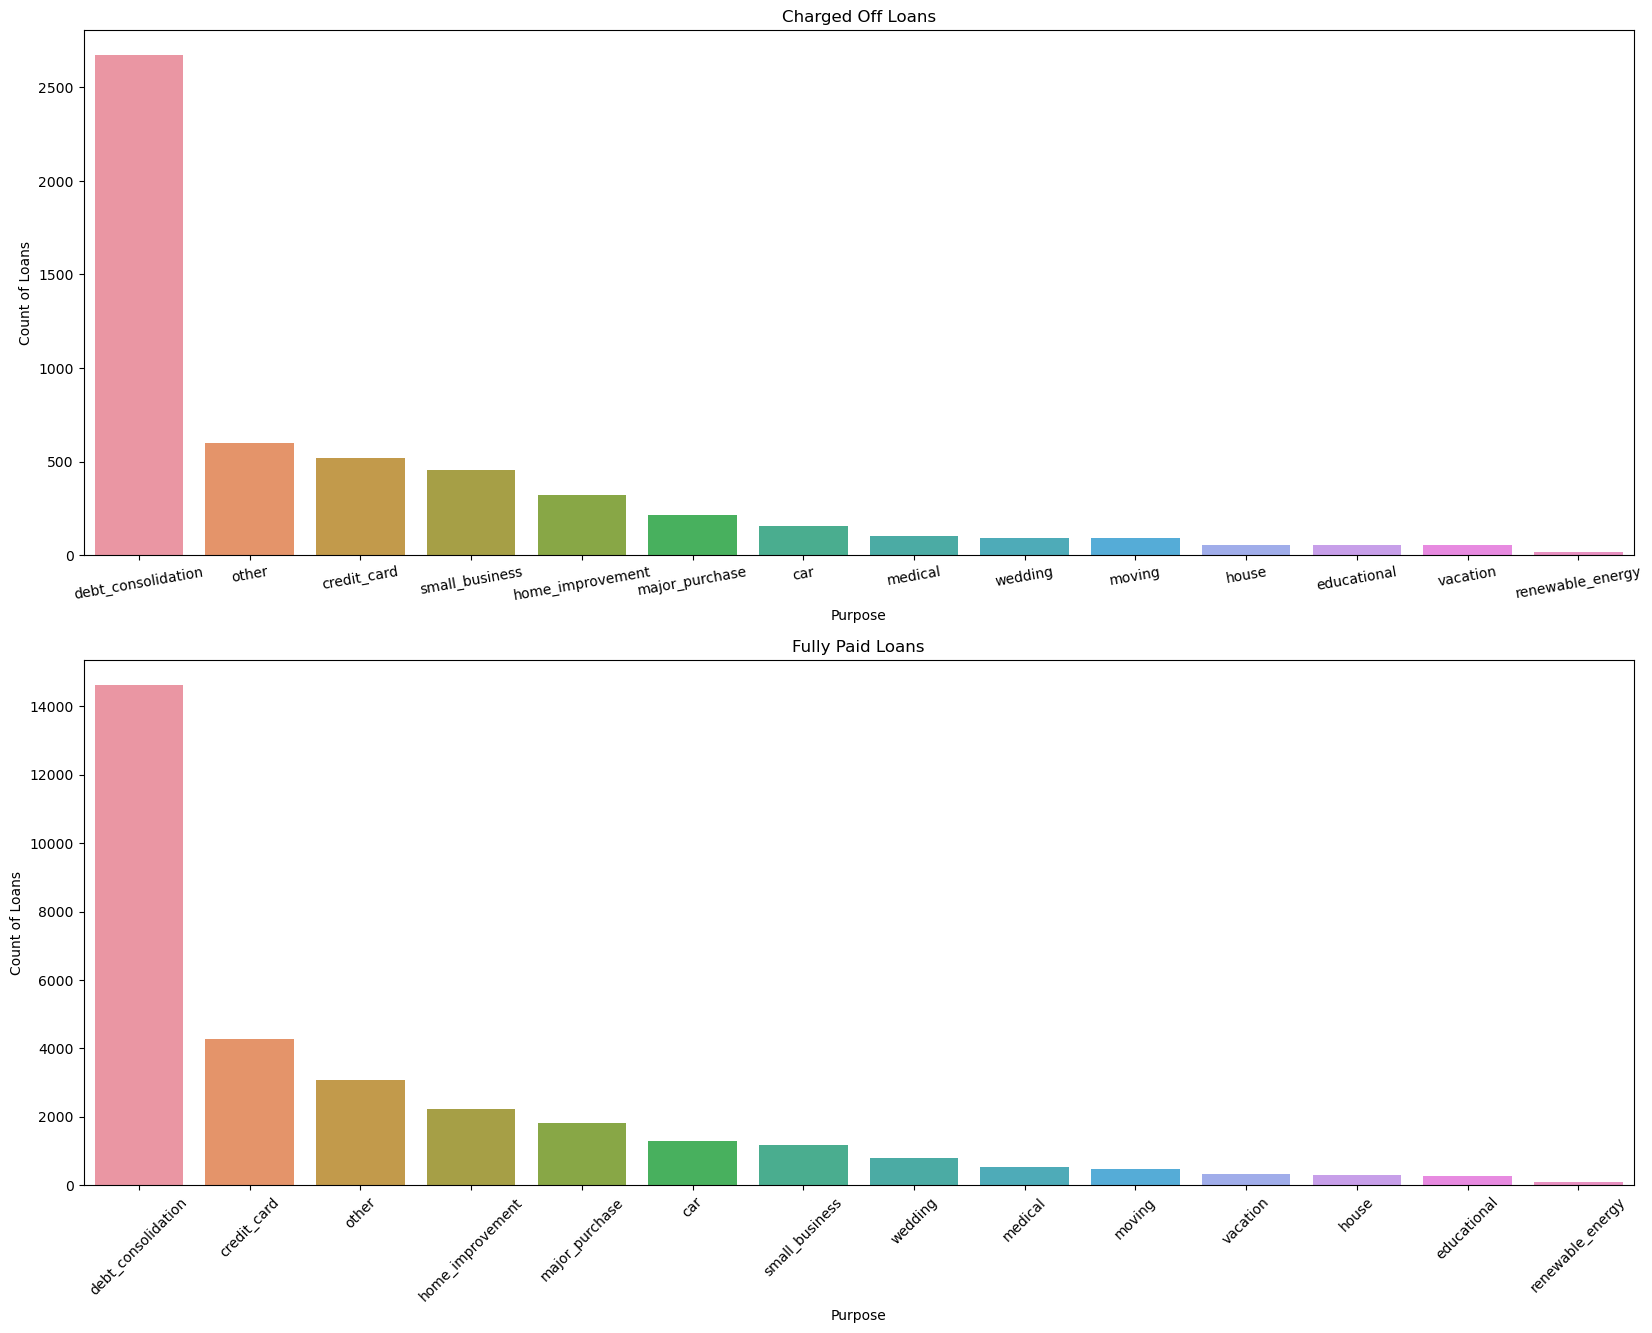

In [ ]:

#Stacked bar chart of Loan status vs Purpose of loan

plt.figure(figsize=(18,6))
sns.countplot(x='purpose', data=loan, hue='loan_status', order=loan['purpose'].value_counts().index)
plt.xticks(rotation=90)
plt.show()



# plt.figure(figsize=(18,6))
# sns.countplot(x='purpose', data=loan_def, order=loan_def['purpose'].value_counts().index)
# plt.xticks(rotation=90)
# plt.show()

fig, ax = plt.subplots(2,1, figsize=(20,15))
sns.countplot(x='purpose', data=loan[loan.loan_status =='Fully Paid'], ax=ax[1], order=loan[loan.loan_status =='Fully Paid']['purpose'].value_counts().index)
sns.countplot(x='purpose', data=loan_def, ax=ax[0], order=loan_def['purpose'].value_counts().index)
ax[0].set_title('Charged Off Loans')
ax[1].set_title('Fully Paid Loans')
ax[0].set_xlabel('Purpose')
ax[1].set_xlabel('Purpose')
ax[0].set_ylabel('Count of Loans')
ax[1].set_ylabel('Count of Loans')
ax[0].xaxis.set_tick_params(rotation=10)
ax[1].xaxis.set_tick_params(rotation=45)
plt.show()



Inference: **Debt consolidation has biggest defaulters, People would have taken loan & clearing that would have been challenge %50**

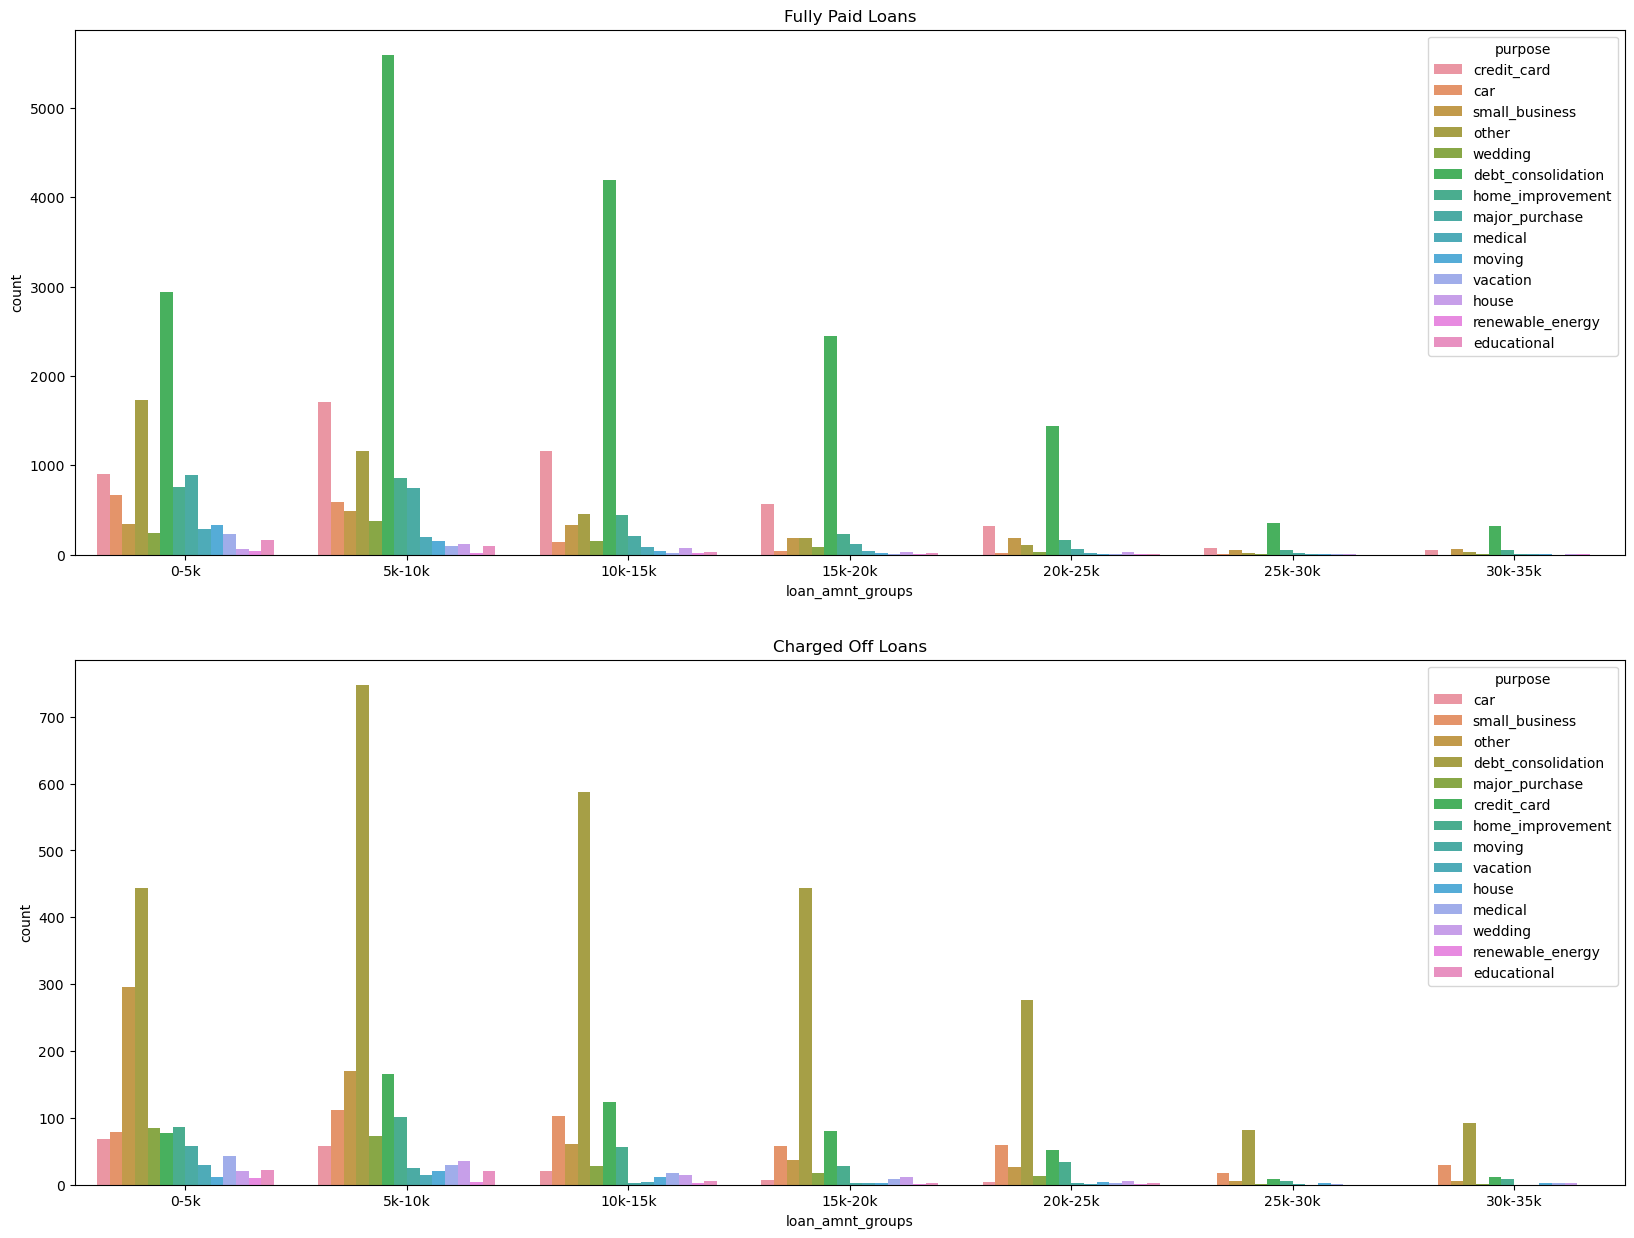

In [ ]:
# plot loan group vs purpose of loan using countplot

fig, ax = plt.subplots(2,1, figsize=(20,15))
sns.countplot(x='loan_amnt_groups', data=loan, hue='purpose', ax=ax[0])
sns.countplot(x='loan_amnt_groups', data=loan_def, hue='purpose', ax=ax[1])
ax[0].set_title('Fully Paid Loans')
ax[1].set_title('Charged Off Loans')
plt.show()


**Debt Consolidation loan type is risky beyond 20K**

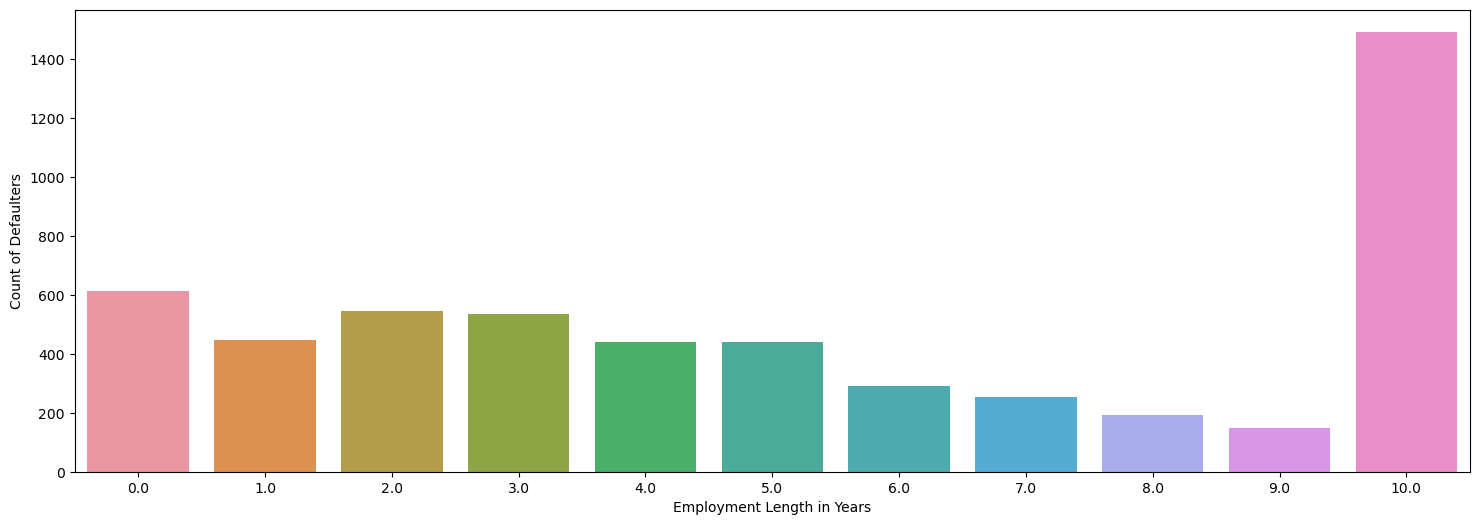

In [ ]:
# Check the distribution of of defaulters with Employment length   

plt.figure(figsize=(18,6))
sns.countplot(x='emp_length', data=loan_def)
plt.xlabel('Employment Length in Years')
plt.ylabel('Count of Defaulters')
plt.show()

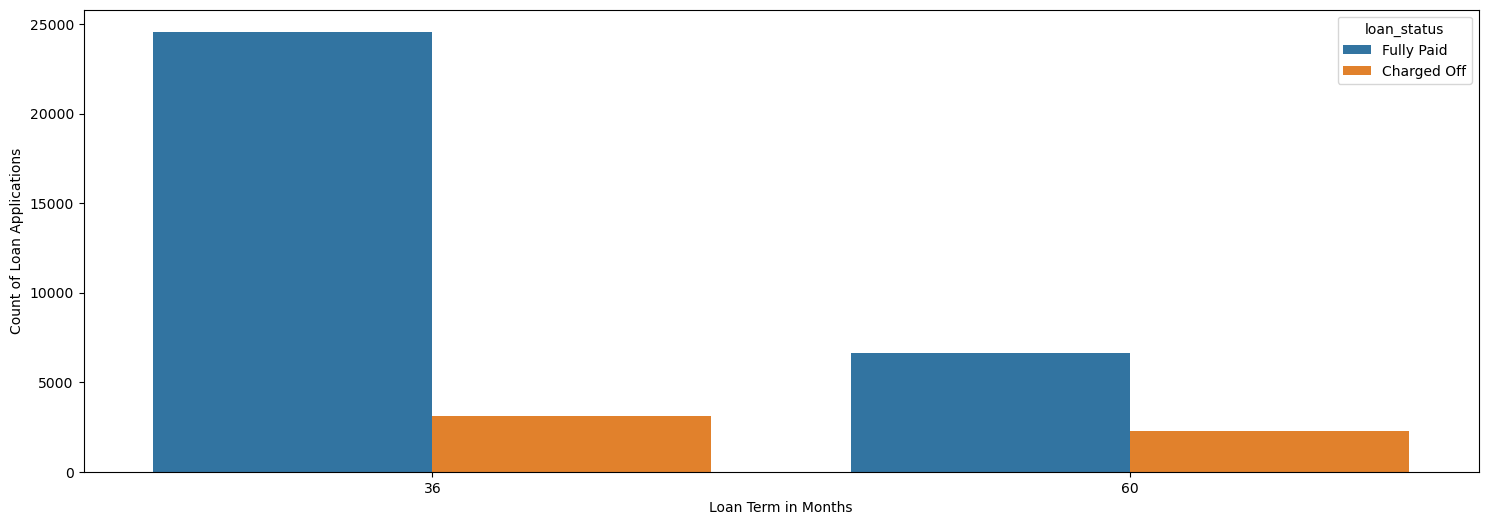

In [ ]:
# check the count of defaulters with loan term using countplot 


plt.figure(figsize=(18,6))
sns.countplot(x='term', data=loan, hue='loan_status')
plt.xlabel('Loan Term in Months')
plt.ylabel('Count of Loan Applications')
plt.show()




Inference: **Term has no impact on defaulters.**

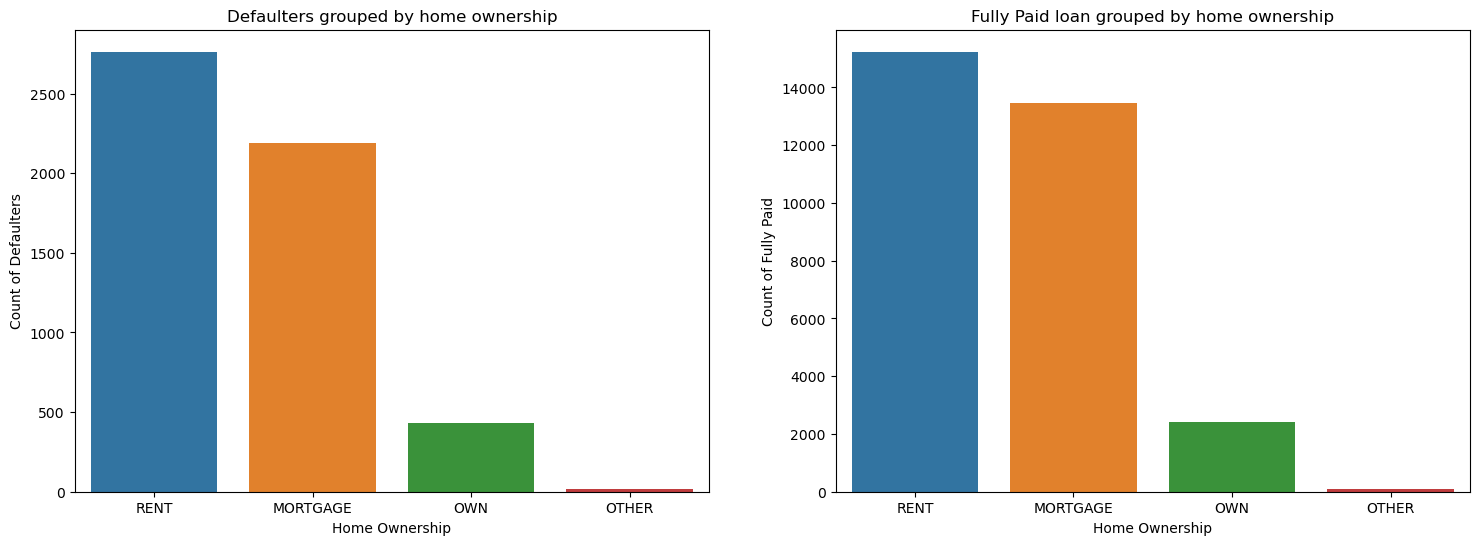

In [ ]:
# Defaulters grouped by home ownership

# arrange by Y axis in descending order

fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='home_ownership', data=loan[loan.loan_status !='Fully Paid'], order=loan['home_ownership'].value_counts().index, ax=ax[0])
sns.countplot(x='home_ownership', data=loan[loan.loan_status =='Fully Paid'], order=loan['home_ownership'].value_counts().index, ax=ax[1])
ax[0].set_title('Defaulters grouped by home ownership')
ax[1].set_title('Fully Paid loan grouped by home ownership')
ax[0].set_ylabel('Count of Defaulters')
ax[1].set_ylabel('Count of Fully Paid')
ax[0].set_xlabel('Home Ownership')
ax[1].set_xlabel('Home Ownership')

plt.show()

Inference: **Home ownership has no impact on defaulters or non defaulters**


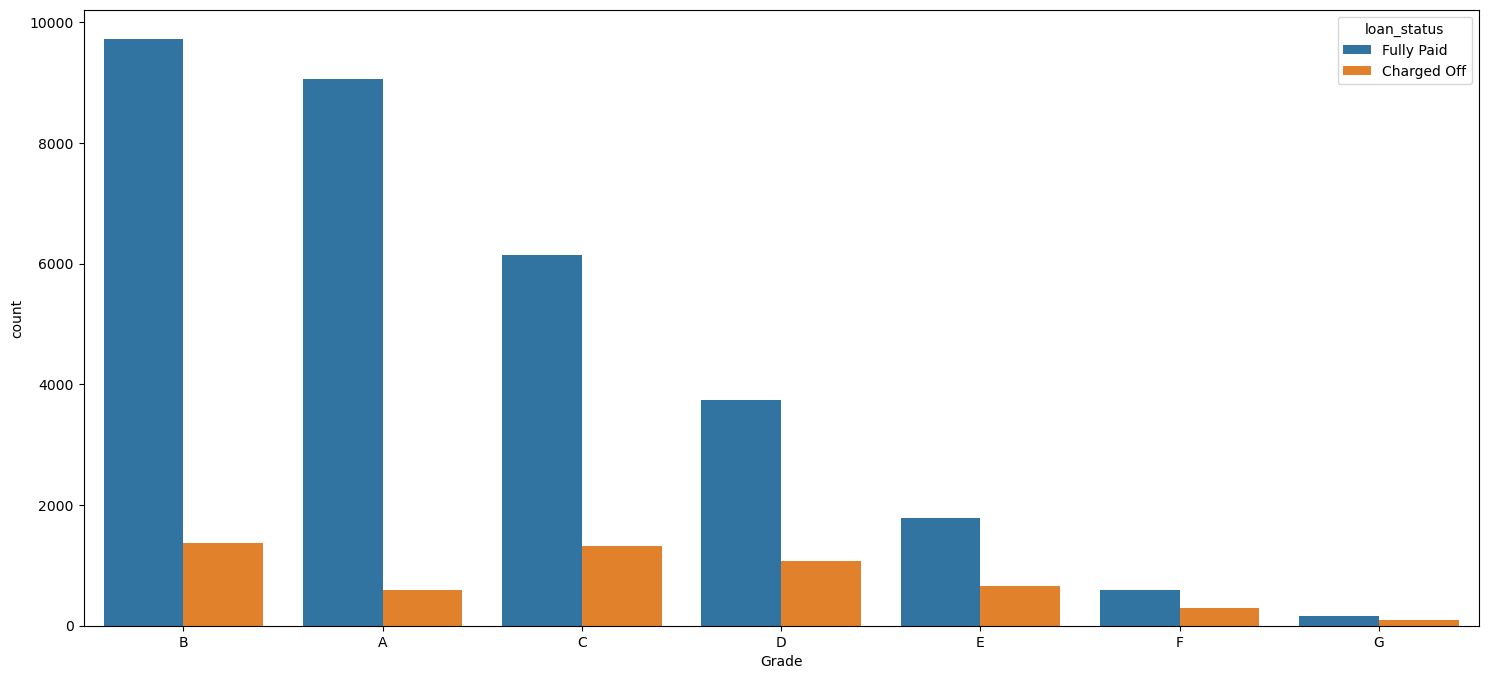

In [ ]:
# Split by Grade and Subgrade

plt.figure(figsize=(18,8))
sns.countplot(x='grade', data=loan, hue='loan_status', order=loan['grade'].value_counts().index)
plt.xlabel('Grade')
plt.show()


Inference: **A Grade People has slightly less risk of becoming defaulter**

In [ ]:
loan.columns

Index(['id', 'annual_inc', 'loan_status', 'loan_amnt', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'term', 'issue_d', 'int_rate',
       'installment', 'grade', 'sub_grade', 'dti', 'delinq_2yrs',
       'home_ownership', 'revol_util', 'purpose', 'verification_status',
       'issue_date', 'issue_month', 'issue_year', 'loan_amnt_groups',
       'interest_groups'],
      dtype='object')

## BiVariate Analsysis ##

**Annual Inc Vs Loan Amount. Scatter plot with hue as loan status**


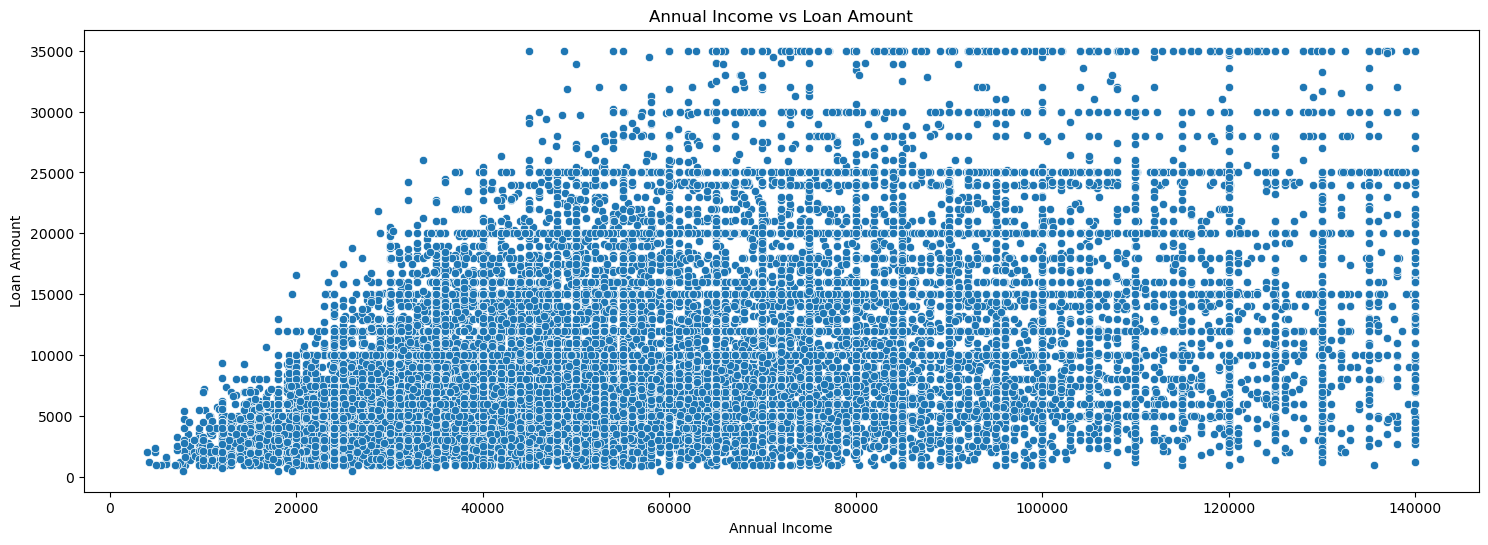

In [ ]:
#Annual Inc vs Loan Amount with hue as loan status

plt.figure(figsize=(18,6))
sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan[loan.loan_status =='Fully Paid'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.show()




d:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x1600 with 0 Axes>

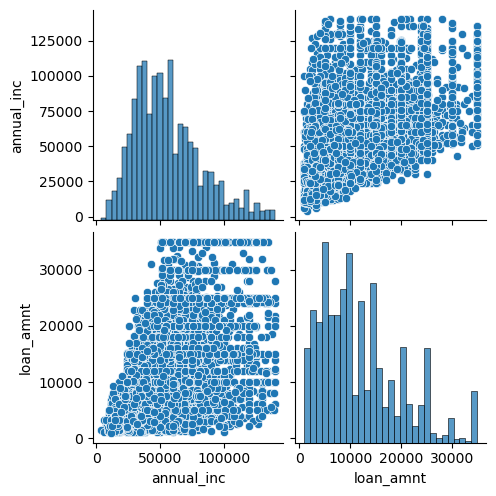

In [ ]:
#Annual Inc vs Loan Amount for defaulters pairplot


plt.figure(figsize=(18,16))
sns.pairplot(data=loan_def, vars=['annual_inc', 'loan_amnt'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

<Figure size 1800x600 with 0 Axes>

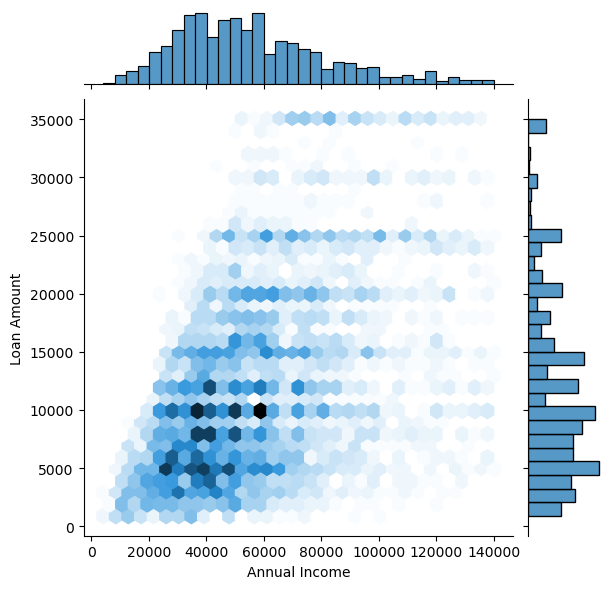

In [ ]:
#Hexbin plot for annual income and loan amount for defaulters

plt.figure(figsize=(18,6))
sns.jointplot(x='annual_inc', y='loan_amnt', data=loan_def, kind='hex')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

Inference: **Most of the loans that are charged off are scattered around ~10K loan amount with Annual income around 20-40K. When loan amount is 1/5th of annual income, possibility of defaulting increases.**

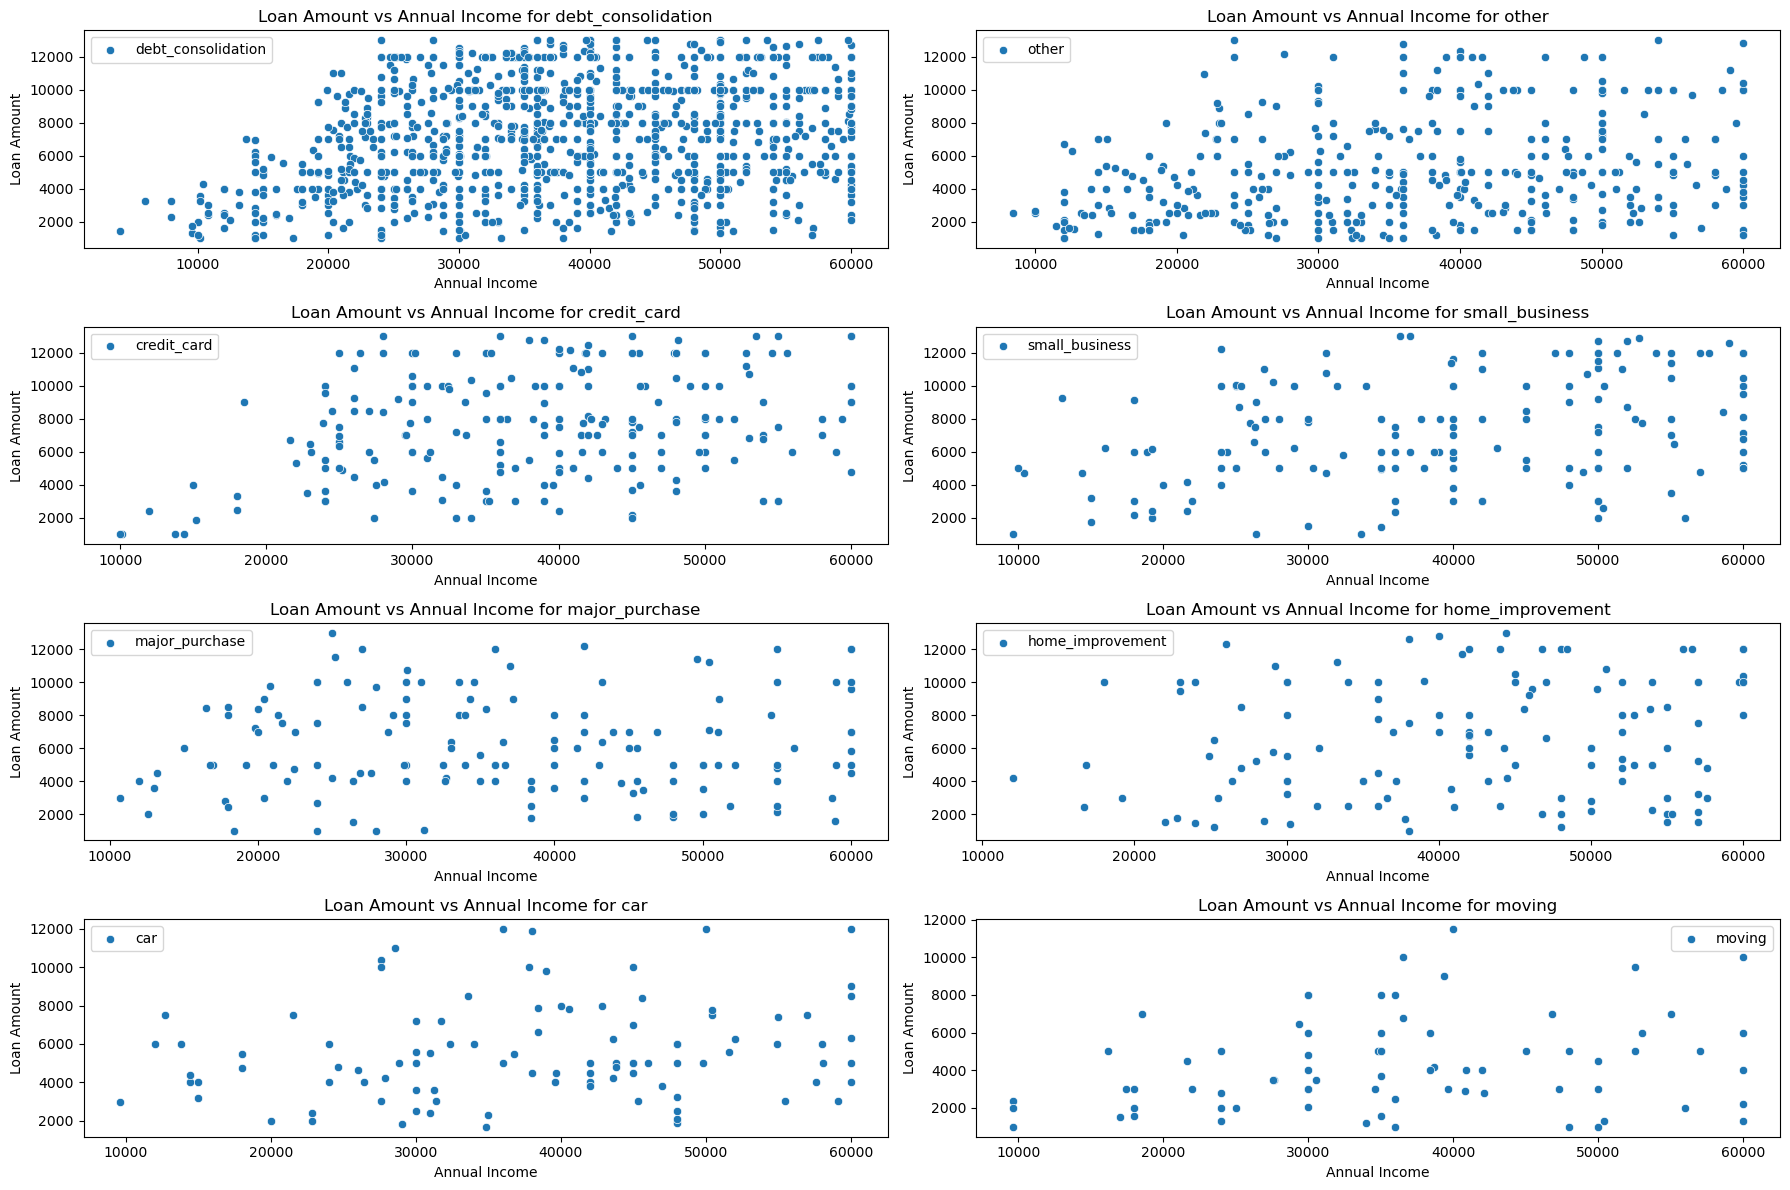

In [ ]:
#Analysing further in the loan amount  range and Income range

#loan amount range 0-13000 & annual income range upto 60K

loan_def1 = loan_def[(loan_def['loan_amnt'] <= 13000) & (loan_def['annual_inc'] <= 60000)]

#plotting subplots for loan amount and annual income with purpose of loan

loan_purpose = loan_def1['purpose'].value_counts().index

fig, axes = plt.subplots(4,2, figsize=(18,12))

#using for loop to plot the subplots

for i in range(8):
    purpose = loan_purpose[i]
    sns.scatterplot(x='annual_inc', y='loan_amnt', data=loan_def1[loan_def1['purpose'] == purpose], ax=axes[i//2][i%2], label=purpose)
    axes[i//2][i%2].set_xlabel('Annual Income')
    axes[i//2][i%2].set_ylabel('Loan Amount')
    axes[i//2][i%2].set_title('Loan Amount vs Annual Income for {}'.format(purpose))
plt.tight_layout()
plt.show()





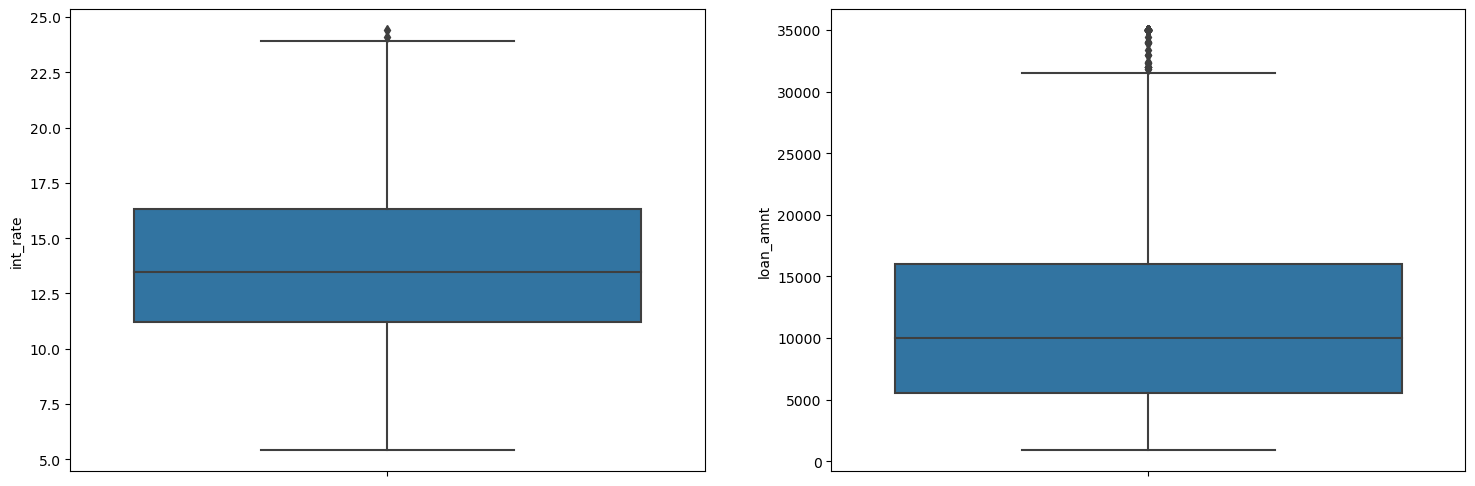

In [ ]:
# Analyse Interest rate distribution and loan amount distribution using scatter plot

# find the correlation between interest rate and defaulters have box plot

fig, axes = plt.subplots(1,2, figsize=(18,6))

sns.boxplot(y='int_rate', data=loan_def, ax=axes[0])
sns.boxplot(y='loan_amnt', data=loan_def, ax=axes[1])
plt.show()

<Figure size 1000x500 with 0 Axes>

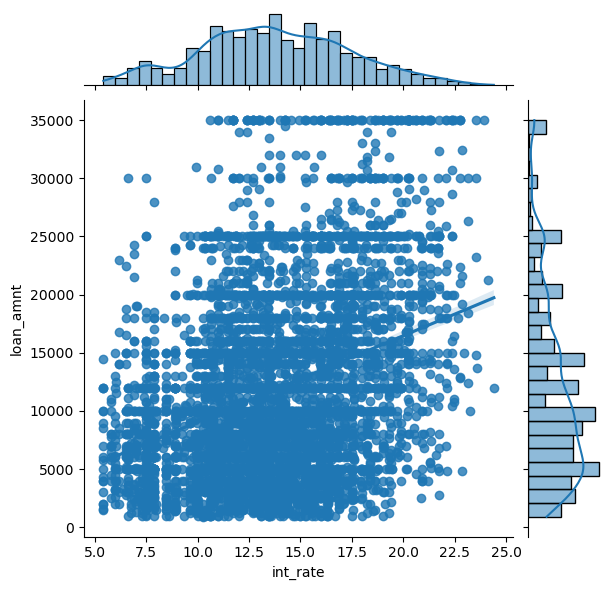

In [ ]:
plt.figure(figsize=(10,5))
sns.jointplot(x='int_rate', y='loan_amnt', data=loan_def, kind='reg')
plt.show()

In [ ]:
loan.columns

Index(['id', 'annual_inc', 'loan_status', 'loan_amnt', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'term', 'issue_d', 'int_rate',
       'installment', 'grade', 'sub_grade', 'dti', 'delinq_2yrs',
       'home_ownership', 'revol_util', 'purpose', 'verification_status',
       'issue_date', 'issue_month', 'issue_year', 'loan_amnt_groups',
       'interest_groups'],
      dtype='object')

In [ ]:
loan.loan_amnt_groups

0          0-5k
1          0-5k
2          0-5k
3        5k-10k
5          0-5k
          ...  
39711      0-5k
39712      0-5k
39713    5k-10k
39714      0-5k
39716    5k-10k
Name: loan_amnt_groups, Length: 36606, dtype: category
Categories (7, object): ['0-5k' < '5k-10k' < '10k-15k' < '15k-20k' < '20k-25k' < '25k-30k' < '30k-35k']

In [ ]:
#group by loan ammount group

loan_g = loan.groupby(['loan_status','loan_amnt_groups'])['loan_amnt_groups'].count()
loan_counts =loan.groupby(['loan_amnt_groups'])['loan_amnt_groups'].count()

In [ ]:
loan_g['Charged Off']


loan_amnt_groups
0-5k       1329
5k-10k     1575
10k-15k    1037
15k-20k     702
20k-25k     482
25k-30k     123
30k-35k     154
Name: loan_amnt_groups, dtype: int64

In [ ]:
charged_off = loan_g['Charged Off']/loan_counts
round(charged_off*100)

loan_amnt_groups
0-5k       14.0
5k-10k     13.0
10k-15k    14.0
15k-20k    18.0
20k-25k    20.0
25k-30k    21.0
30k-35k    29.0
Name: loan_amnt_groups, dtype: float64

In [ ]:
charged_off.index

CategoricalIndex(['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k',
                  '30k-35k'],
                 categories=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k'], ordered=True, dtype='category', name='loan_amnt_groups')

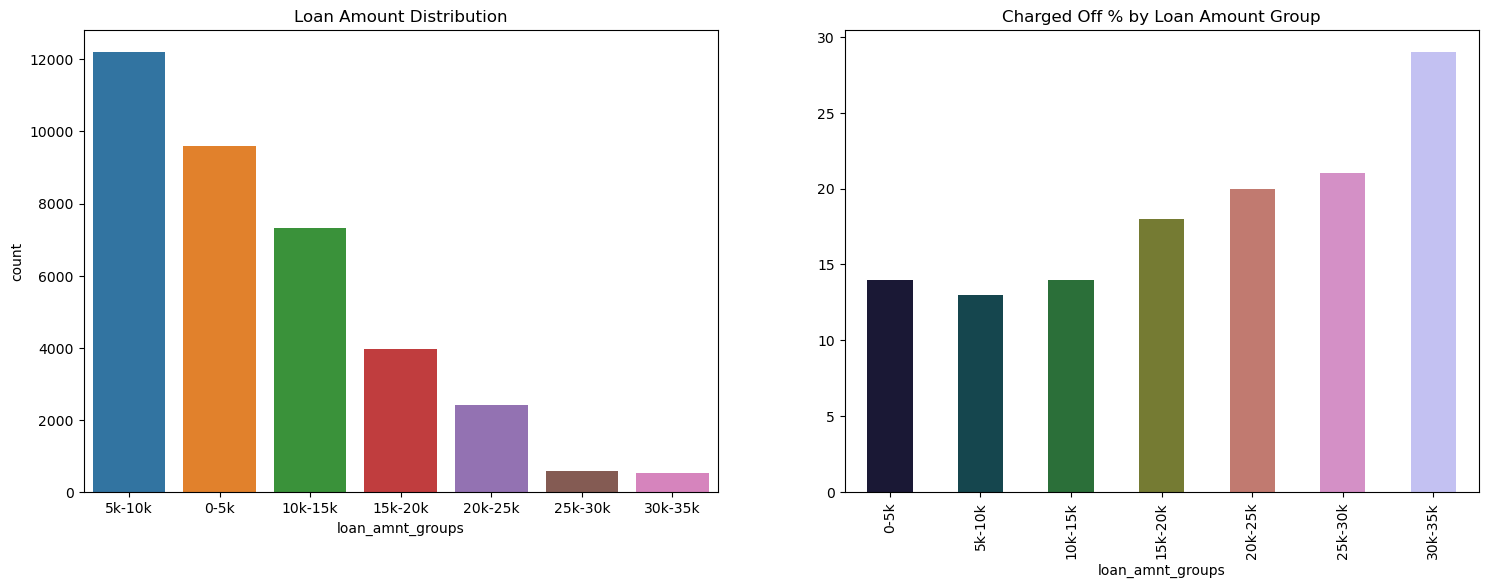

In [ ]:
#plotting the bar chart for loan amount group

charged_off = loan_g['Charged Off']/loan_counts

fig,axis = plt.subplots(1,2, figsize=(18,6))

sns.countplot(x='loan_amnt_groups', data=loan, order=loan['loan_amnt_groups'].value_counts().index, ax=axis[0])
round(charged_off*100).plot.bar(color=sns.color_palette('cubehelix', 8))
axis[0].set_title('Loan Amount Distribution')
axis[1].set_title('Charged Off % by Loan Amount Group')

plt.show()

Inference: **Charged off loans are more in 30-35K Range.** 

In [ ]:
#loan amount group by loan purpose

loan_g1 = loan.groupby(['loan_status','loan_amnt_groups','purpose'])['loan_amnt_groups'].count()
loan_counts1 =loan.groupby(['loan_amnt_groups','purpose'])['loan_amnt_groups'].count()
loan_g1['Charged Off'].head(10)


loan_amnt_groups  purpose           
0-5k              car                    68
                  credit_card            77
                  debt_consolidation    444
                  educational            22
                  home_improvement       86
                  house                  12
                  major_purchase         84
                  medical                43
                  moving                 58
                  other                 296
Name: loan_amnt_groups, dtype: int64

In [ ]:
#for each loan amount group of charged off loans, find the percentage of loan purpose and plot the bar chart

#Convert Series into a dataframe and reset the index

loan_g2 =pd.DataFrame(loan_g1['Charged Off'])
loan_g2.loc[:,:].loan_amnt_groups =loan_g2.loc[:,:].loan_amnt_groups.astype(int)
loan_g2.rename(columns={'loan_amnt_groups':'count'}, inplace=True)


group_count =loan_g2.groupby('loan_amnt_groups')['count'].sum()

loan_group_list = list(group_count.index)

#assign percentage of loan purpose for each loan amount group

loan_g2['percentage'] = round(loan_g2['count']/group_count.loc[loan_g2.index.get_level_values('loan_amnt_groups')].values*100)
    
loan_g2['percentage'] = loan_g2['percentage'].astype(float)

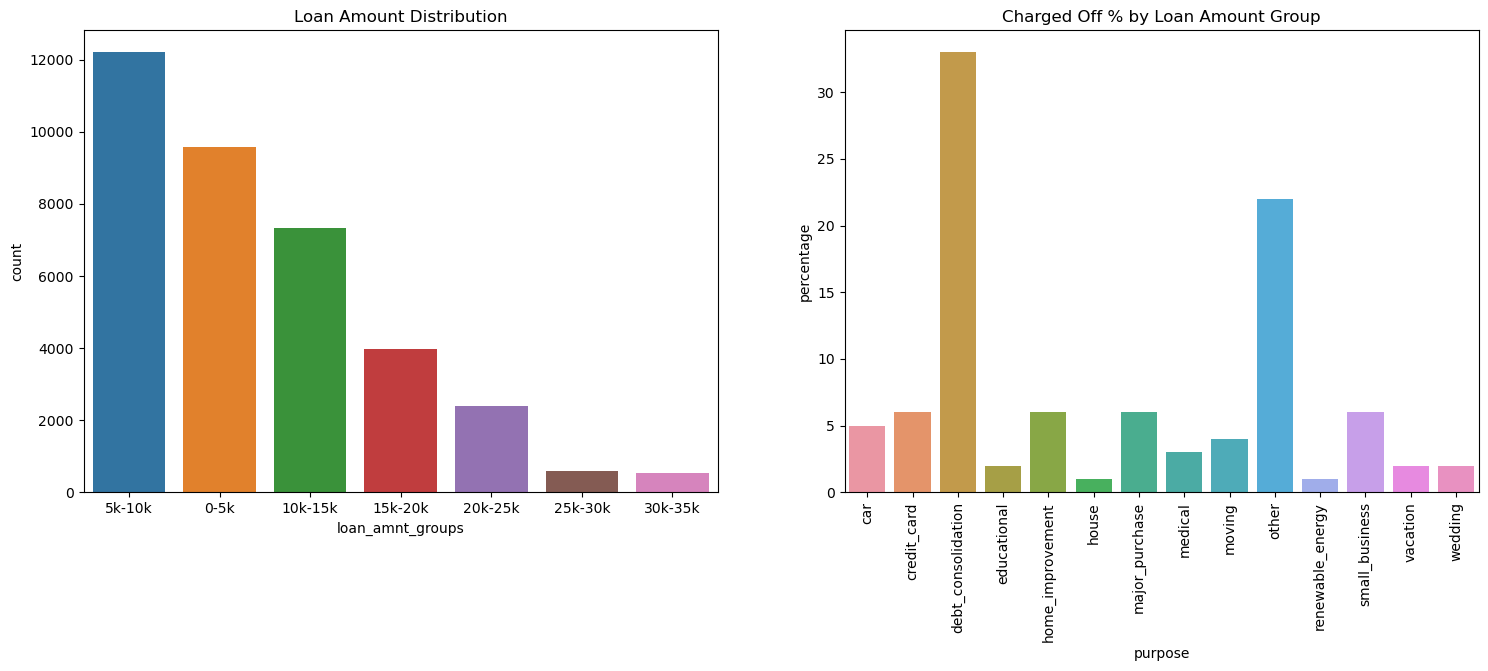

In [ ]:
# extract loan percent above 10%
loan_g2[loan_g2['percentage'] > 10]

#plot the bar chart for loan amount group and loan purpose with percentage

fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.countplot(x='loan_amnt_groups', data=loan, order=loan['loan_amnt_groups'].value_counts().index, ax=axes[0])
sns.barplot(x=loan_g2.loc[loan_group_list[0]].index.get_level_values('purpose'), y=loan_g2.loc[loan_group_list[0]]['percentage'], ax=axes[1])
axes[0].set_title('Loan Amount Distribution')
axes[1].set_title('Charged Off % by Loan Amount Group')
plt.xticks(rotation=90)
plt.show()



In [ ]:
loan_15g = loan_g2[loan_g2['percentage'] > 10]
loan_15g_list = list(loan_15g.index.get_level_values('loan_amnt_groups').unique())

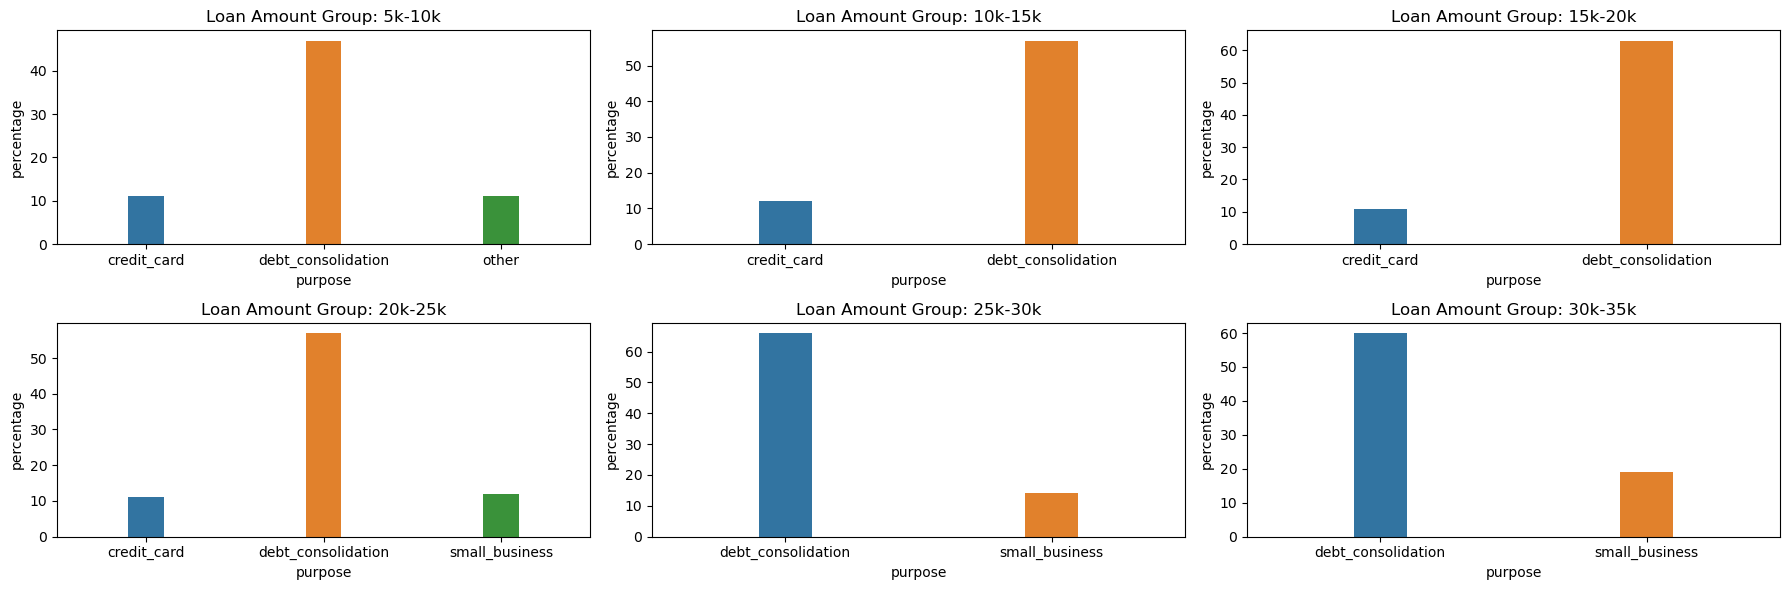

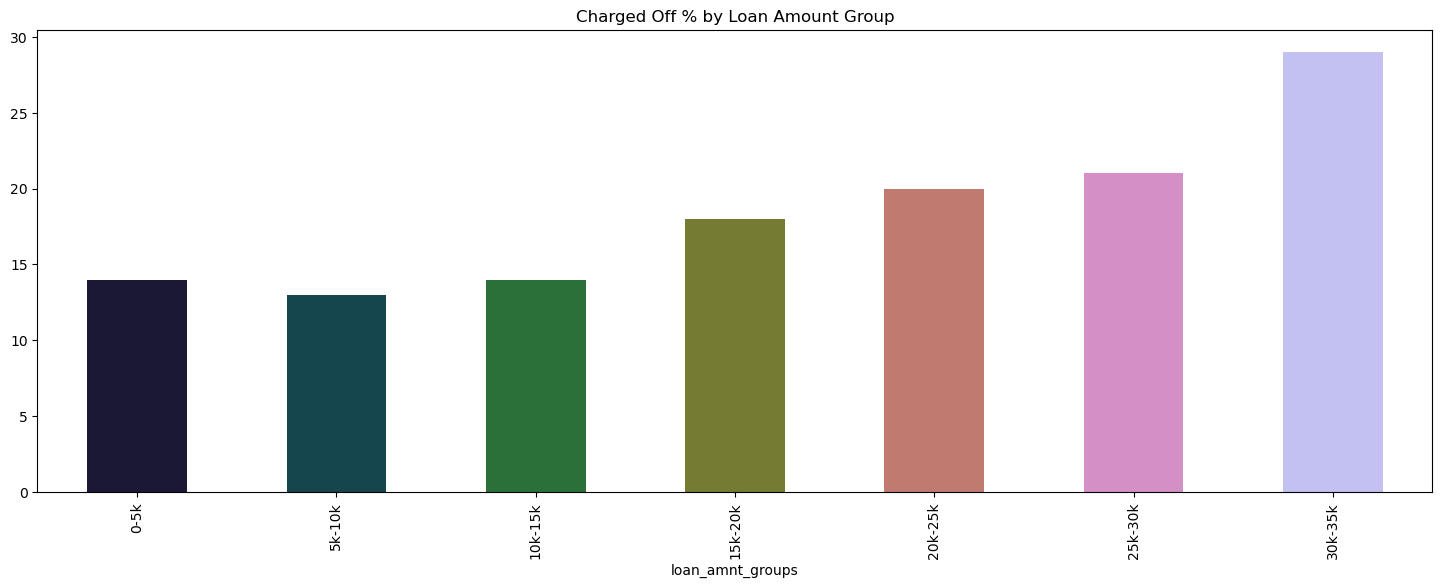

In [ ]:
fig, axes = plt.subplots(2,3, figsize=(18,6))
sns.barplot(x=loan_15g.loc[loan_15g_list[1]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[1]]['percentage'], ax=axes[0,0], width=0.2)
axes[0,0].set_title('Loan Amount Group: 5k-10k')
sns.barplot(x=loan_15g.loc[loan_15g_list[2]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[2]]['percentage'], ax=axes[0,1], width=0.2)
axes[0,1].set_title('Loan Amount Group: 10k-15k')
sns.barplot(x=loan_15g.loc[loan_15g_list[3]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[3]]['percentage'], ax=axes[0,2], width=0.2)
axes[0,2].set_title('Loan Amount Group: 15k-20k')
sns.barplot(x=loan_15g.loc[loan_15g_list[4]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[4]]['percentage'], ax=axes[1,0], width=0.2)
axes[1,0].set_title('Loan Amount Group: 20k-25k')
sns.barplot(x=loan_15g.loc[loan_15g_list[5]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[5]]['percentage'], ax=axes[1,1], width=0.2)
axes[1,1].set_title('Loan Amount Group: 25k-30k')
sns.barplot(x=loan_15g.loc[loan_15g_list[6]].index.get_level_values('purpose'), y=loan_15g.loc[loan_group_list[6]]['percentage'], ax=axes[1,2], width=0.2)
axes[1,2].set_title('Loan Amount Group: 30k-35k')
plt.tight_layout()

plt.show()

plt.figure(figsize=(18,6))
round(charged_off*100).plot.bar(color=sns.color_palette('cubehelix', 8))
plt.title('Charged Off % by Loan Amount Group')
plt.show()


Inference: **~80% of charged off loans in range 30-35K is from Debt Consolidation and Small Business. Small Business with high loan amount is also risky**